In [ ]:
from google.colab import drive

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.shape

(284807, 31)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.isnull().values.any()

False

In [ ]:
pd.value_counts(df['Class'])

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
X = df.drop('Class',axis  = 1)
y = df['Class']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


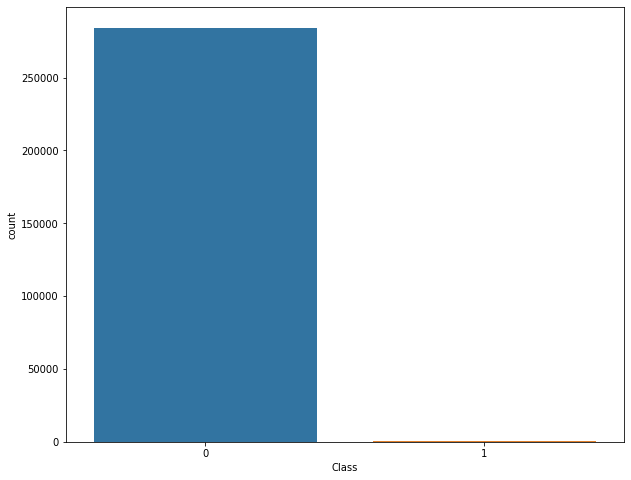

In [ ]:
lay = plt.figure(figsize=(10,8))
lay = sns.countplot('Class',data = df)

In [ ]:
fraud = df[df['Class']==1]
normal = df[df['Class']==0]

In [ ]:
fraud.shape,normal.shape

((492, 31), (284315, 31))

In [ ]:
fraud['Amount'].describe(),normal['Amount'].describe()

(count     492.000000
 mean      122.211321
 std       256.683288
 min         0.000000
 25%         1.000000
 50%         9.250000
 75%       105.890000
 max      2125.870000
 Name: Amount, dtype: float64, count    284315.000000
 mean         88.291022
 std         250.105092
 min           0.000000
 25%           5.650000
 50%          22.000000
 75%          77.050000
 max       25691.160000
 Name: Amount, dtype: float64)

**UnderSampling The Normal Class using Random Under Sampling** 

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=1)
X_ras, y_ras = rus.fit_resample(X,y)

In [ ]:
X_ras.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,83257.0,1.463581,-1.216739,0.472041,-1.604414,-1.394818,-0.000312,-1.325623,0.040298,-1.830003,1.579693,0.476923,-0.389919,0.838797,-0.382181,0.182146,0.281937,-0.187158,1.053819,0.149596,-0.216952,-0.045193,0.203483,-0.140594,-0.498560,0.417239,-0.072706,0.043363,0.013614,38.30
1,119837.0,2.005203,-0.197792,-1.035941,0.324613,-0.209116,-0.883251,-0.019102,-0.094402,0.468737,0.271570,0.864796,0.493239,-1.321409,0.737676,-0.478679,0.068076,-0.378557,-0.333577,0.340892,-0.306106,-0.241369,-0.652034,0.361015,-0.017209,-0.397889,0.182754,-0.079495,-0.072713,0.99
2,96977.0,-0.778253,0.976542,-0.424833,-1.695272,2.453413,3.718754,-0.535026,1.459703,1.263373,-2.175613,0.941312,-2.502579,1.395332,0.569942,0.055159,0.602526,1.199767,0.617527,-0.576153,-0.167457,-0.318223,-0.848757,-0.012671,0.509811,-0.294719,-0.291315,0.001616,0.088429,0.91
3,43882.0,0.932163,-0.563779,0.835066,0.565409,-0.088161,2.054764,-0.917655,0.705559,0.975250,-0.448774,-0.289369,0.529140,-0.134544,-0.265785,1.357911,-0.929916,0.847582,-1.968559,-1.404010,-0.127351,0.021583,0.282204,0.049427,-1.455271,-0.014607,0.473474,0.076433,0.015725,60.85
4,170415.0,-0.351205,0.529024,0.162951,-0.491799,1.583662,-0.225069,0.890536,-0.086463,-0.384137,-0.635806,0.633074,-0.331727,-1.161630,-0.685291,-0.391933,0.275993,0.243709,0.545835,0.808642,0.121763,-0.270316,-0.760122,-0.038366,0.102645,-0.487042,0.194311,-0.088470,-0.051639,13.99


In [ ]:
y_ras.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [ ]:
y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

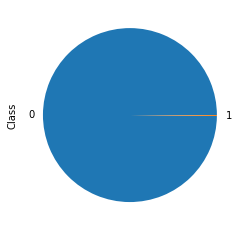

In [ ]:
y.value_counts().plot.pie()

(0    492
 1    492
 Name: Class, dtype: int64,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fbbf3108f90>)

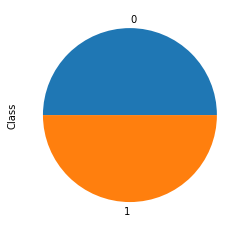

In [ ]:
y_ras.value_counts(),y_ras.value_counts().plot.pie()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [ ]:
knn.fit(X,y)
pred = knn.predict(X_ras)
classification_report(y_ras, pred)

'              precision    recall  f1-score   support\n\n           0       0.53      1.00      0.69       492\n           1       1.00      0.11      0.20       492\n\n    accuracy                           0.56       984\n   macro avg       0.76      0.56      0.45       984\nweighted avg       0.76      0.56      0.45       984\n'

In [ ]:
cfm = confusion_matrix

In [ ]:
cfm(y_ras, pred)

array([[492,   0],
       [437,  55]])

In [ ]:
acc = accuracy_score(y_ras, pred)
acc

0.5558943089430894

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()
rf.fit(X, y)
y_pred = rf.predict(X_ras)

In [ ]:
clr =classification_report
clr(y_ras, y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00       492\n           1       1.00      1.00      1.00       492\n\n    accuracy                           1.00       984\n   macro avg       1.00      1.00      1.00       984\nweighted avg       1.00      1.00      1.00       984\n'

In [ ]:
cfm(y_ras, y_pred)

array([[492,   0],
       [  1, 491]])

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
racc = accuracy_score(y_ras, y_pred)
racc

0.9989837398373984

In [ ]:
clr(y_ras, y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00       492\n           1       1.00      1.00      1.00       492\n\n    accuracy                           1.00       984\n   macro avg       1.00      1.00      1.00       984\nweighted avg       1.00      1.00      1.00       984\n'

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state = 5,max_iter=10000)

In [ ]:
fame = LR.fit(X,y)

In [ ]:
pre = LR.predict(X_ras)
pre

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
accuracy = accuracy_score(y_ras, pre)
accuracy

0.8109756097560976

In [ ]:
clr(y_ras, pre)

'              precision    recall  f1-score   support\n\n           0       0.73      1.00      0.84       492\n           1       1.00      0.62      0.77       492\n\n    accuracy                           0.81       984\n   macro avg       0.86      0.81      0.80       984\nweighted avg       0.86      0.81      0.80       984\n'

In [ ]:
from sklearn.metrics import auc, roc_auc_score,f1_score
auc(y_ras, pre)

0.5

In [ ]:
roc_auc_score(y_ras, pre)

0.8109756097560976

In [ ]:
f1_score(y_ras, pre)

0.7669172932330827

In [ ]:
lag = cfm(y_ras,pre)
lag

array([[492,   0],
       [186, 306]])

In [ ]:
rf.fit(X_ras, y_ras)
y_pre = rf.predict(X)

In [ ]:
clr(y, y_pre)

'              precision    recall  f1-score   support\n\n           0       1.00      0.97      0.99    284315\n           1       0.06      1.00      0.11       492\n\n    accuracy                           0.97    284807\n   macro avg       0.53      0.99      0.55    284807\nweighted avg       1.00      0.97      0.98    284807\n'